In [184]:
%matplotlib inline
import re
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dlogprocess import Dlog


class DlyLineDlog(Dlog):
    dly_range1 = []
    dly_range2 = []
    dly_range3 = []

    def __init__(self, dlogpath):
        super(DlyLineDlog, self).__init__(dlogpath)
        self.dlog_data = self.screen_pass(write_to_file=0)

    def get_dly_val(self):
        for x in range(2000, 4100, 100):
            dly_val = self.filter_keyword("Delay= %d(us). " % x, 2, 10, offset=4)
            dly_val = [float(i) for i in dly_val]
            self.dly_range1.append(dly_val)
        for x in range(4000, 10200, 200):
            dly_val = self.filter_keyword("Delay = %d(us). " % x, 2, 10, offset=4)
            dly_val = [float(i) for i in dly_val]
            self.dly_range2.append(dly_val)
        for x in range(10200, 20200, 200):
            dly_val = self.filter_keyword("Delay = %d(us). " % x, 2, 10, offset=4)
            dly_val = [float(i) for i in dly_val]
            self.dly_range3.append(dly_val)

#     def process_val(self):
#         df = pd.DataFrame(self.dly_range1, [x for x in range(2000, 4100, 100)])
#         print(df.head())
#         return df

In [185]:
dly = DlyLineDlog(".\\data\\Delay_line\\rising_edge.txt")

In [186]:
dly.get_dly_val()

In [187]:
print(dly.dly_range1)

[[1.95, 1.95, 1.94, 1.95, 1.95, 1.96, 1.95, 1.95, 1.95, 1.95], [2.0685, 2.0475, 2.0475, 2.037, 2.037, 2.0475, 2.0685, 2.0475, 2.058, 2.0475], [2.156, 2.156, 2.156, 2.156, 2.134, 2.145, 2.167, 2.156, 2.156, 2.156], [2.254, 2.254, 2.254, 2.2425, 2.2425, 2.2425, 2.254, 2.254, 2.2425, 2.2425], [2.364, 2.34, 2.352, 2.352, 2.34, 2.34, 2.364, 2.352, 2.352, 2.352], [2.475, 2.4625, 2.475, 2.475, 2.4375, 2.4375, 2.4625, 2.475, 2.4625, 2.45], [2.561, 2.574, 2.574, 2.561, 2.548, 2.548, 2.561, 2.574, 2.561, 2.561], [2.6595, 2.6595, 2.673, 2.6595, 2.673, 2.6595, 2.673, 2.673, 2.6595, 2.6595], [2.758, 2.758, 2.772, 2.772, 2.758, 2.772, 2.772, 2.772, 2.772, 2.758], [2.8565, 2.8565, 2.8565, 2.871, 2.8565, 2.8855, 2.871, 2.871, 2.871, 2.8565], [2.985, 2.97, 2.955, 2.985, 2.97, 2.955, 2.985, 2.985, 2.97, 2.97], [3.0845, 3.0535, 3.0535, 3.069, 3.069, 3.0845, 3.069, 3.0845, 3.069, 3.069], [3.2, 3.184, 3.184, 3.152, 3.168, 3.184, 3.184, 3.184, 3.184, 3.168], [3.3, 3.2835, 3.3, 3.2835, 3.2835, 3.267, 3.2835,

In [188]:
df = pd.DataFrame(dly.dly_range1)

In [189]:
df = df.T


In [190]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.95,2.0685,2.156,2.2540,2.364,2.4750,2.561,2.6595,2.758,2.8565,...,3.0845,3.200,3.3000,3.400,3.4825,3.582,3.7000,3.781,3.9000,3.98
1,1.95,2.0475,2.156,2.2540,2.340,2.4625,2.574,2.6595,2.758,2.8565,...,3.0535,3.184,3.2835,3.400,3.5000,3.582,3.7000,3.800,3.8805,3.98
2,1.94,2.0475,2.156,2.2540,2.352,2.4750,2.574,2.6730,2.772,2.8565,...,3.0535,3.184,3.3000,3.383,3.5000,3.600,3.6815,3.781,3.9000,3.98
3,1.95,2.0370,2.156,2.2425,2.352,2.4750,2.561,2.6595,2.772,2.8710,...,3.0690,3.152,3.2835,3.383,3.5000,3.600,3.6815,3.781,3.8805,4.00
4,1.95,2.0370,2.134,2.2425,2.340,2.4375,2.548,2.6730,2.758,2.8565,...,3.0690,3.168,3.2835,3.383,3.4825,3.582,3.6815,3.800,3.8805,3.98
5,1.96,2.0475,2.145,2.2425,2.340,2.4375,2.548,2.6595,2.772,2.8855,...,3.0845,3.184,3.2670,3.383,3.4825,3.582,3.7000,3.781,3.8805,3.98
6,1.95,2.0685,2.167,2.2540,2.364,2.4625,2.561,2.6730,2.772,2.8710,...,3.0690,3.184,3.2835,3.383,3.4825,3.600,3.7000,3.800,3.8805,4.00
7,1.95,2.0475,2.156,2.2540,2.352,2.4750,2.574,2.6730,2.772,2.8710,...,3.0845,3.184,3.2835,3.383,3.4825,3.582,3.6815,3.800,3.9000,3.98
8,1.95,2.0580,2.156,2.2425,2.352,2.4625,2.561,2.6595,2.772,2.8710,...,3.0690,3.184,3.2835,3.383,3.4825,3.582,3.7000,3.800,3.8805,3.98
9,1.95,2.0475,2.156,2.2425,2.352,2.4500,2.561,2.6595,2.758,2.8565,...,3.0690,3.168,3.2835,3.366,3.4825,3.582,3.6815,3.800,3.8805,3.98


In [191]:
# dfshape = df.shape
# vcc_pattern = [3.7,3.6,3.5,3.4,3.3,3.2,3.1,3.0,2.9,2.8] 
# delay_time_len = dfshape[1]/len(vcc_pattern)
# column_header_list = []
# for x in range(0,int(delay_time_len)):
#     column_header_list += vcc_pattern

# df.columns = column_header_list

In [192]:
df['VDD'] =  [3.7,3.6,3.5,3.4,3.3,3.2,3.1,3.0,2.9,2.8] 

In [193]:
df['part'] = 1

In [194]:
df = df.set_index(['part'])

In [195]:
df.index

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='int64', name='part')

In [196]:
tmpdf = df.copy(deep=True)
del(tmpdf['VDD'])


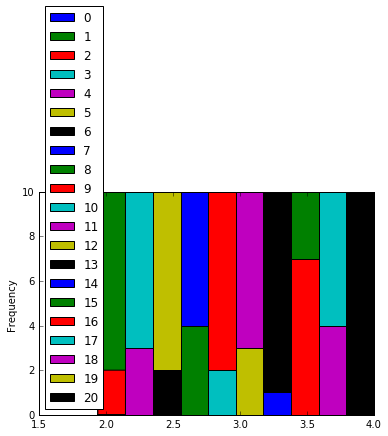

In [197]:
tmpdf.plot(kind="hist")

In [203]:
df[[1][0]]

part
1    2.0685
1    2.0475
1    2.0475
1    2.0370
1    2.0370
1    2.0475
1    2.0685
1    2.0475
1    2.0580
1    2.0475
Name: 1, dtype: float64

In [215]:


df["mynewcol"] = df.apply(lambda x: x[3]/x[5], axis=1)

In [216]:
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,VDD,mynewcol
part,,,,,,,,,,,,,,,,,,,,,
1,1.95,2.0685,2.156,2.2540,2.364,2.4750,2.561,2.6595,2.758,2.8565,...,3.3000,3.400,3.4825,3.582,3.7000,3.781,3.9000,3.98,3.7,0.910707
1,1.95,2.0475,2.156,2.2540,2.340,2.4625,2.574,2.6595,2.758,2.8565,...,3.2835,3.400,3.5000,3.582,3.7000,3.800,3.8805,3.98,3.6,0.915330
1,1.94,2.0475,2.156,2.2540,2.352,2.4750,2.574,2.6730,2.772,2.8565,...,3.3000,3.383,3.5000,3.600,3.6815,3.781,3.9000,3.98,3.5,0.910707
1,1.95,2.0370,2.156,2.2425,2.352,2.4750,2.561,2.6595,2.772,2.8710,...,3.2835,3.383,3.5000,3.600,3.6815,3.781,3.8805,4.00,3.4,0.906061
1,1.95,2.0370,2.134,2.2425,2.340,2.4375,2.548,2.6730,2.758,2.8565,...,3.2835,3.383,3.4825,3.582,3.6815,3.800,3.8805,3.98,3.3,0.920000
1,1.96,2.0475,2.145,2.2425,2.340,2.4375,2.548,2.6595,2.772,2.8855,...,3.2670,3.383,3.4825,3.582,3.7000,3.781,3.8805,3.98,3.2,0.920000
1,1.95,2.0685,2.167,2.2540,2.364,2.4625,2.561,2.6730,2.772,2.8710,...,3.2835,3.383,3.4825,3.600,3.7000,3.800,3.8805,4.00,3.1,0.915330
1,1.95,2.0475,2.156,2.2540,2.352,2.4750,2.574,2.6730,2.772,2.8710,...,3.2835,3.383,3.4825,3.582,3.6815,3.800,3.9000,3.98,3.0,0.910707
1,1.95,2.0580,2.156,2.2425,2.352,2.4625,2.561,2.6595,2.772,2.8710,...,3.2835,3.383,3.4825,3.582,3.7000,3.800,3.8805,3.98,2.9,0.910660


In [217]:
df2 = df.copy(deep=True)

In [222]:
df = df.append(df2)

In [231]:
df3 = df[(df[0] > 2) & (df[1] >2)]

In [232]:
df3

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,VDD,mynewcol
part,,,,,,,,,,,,,,,,,,,,,
1,3.90,4.137,4.312,4.508,4.728,4.950,5.122,5.319,5.516,5.713,...,6.600,6.800,6.965,7.164,7.400,7.562,7.800,7.96,7.4,1.821414
1,3.90,4.095,4.312,4.508,4.680,4.925,5.148,5.319,5.516,5.713,...,6.567,6.800,7.000,7.164,7.400,7.600,7.761,7.96,7.2,1.830660
1,3.88,4.095,4.312,4.508,4.704,4.950,5.148,5.346,5.544,5.713,...,6.600,6.766,7.000,7.200,7.363,7.562,7.800,7.96,7.0,1.821414
1,3.90,4.074,4.312,4.485,4.704,4.950,5.122,5.319,5.544,5.742,...,6.567,6.766,7.000,7.200,7.363,7.562,7.761,8.00,6.8,1.812121
1,3.90,4.074,4.268,4.485,4.680,4.875,5.096,5.346,5.516,5.713,...,6.567,6.766,6.965,7.164,7.363,7.600,7.761,7.96,6.6,1.840000
1,3.92,4.095,4.290,4.485,4.680,4.875,5.096,5.319,5.544,5.771,...,6.534,6.766,6.965,7.164,7.400,7.562,7.761,7.96,6.4,1.840000
1,3.90,4.137,4.334,4.508,4.728,4.925,5.122,5.346,5.544,5.742,...,6.567,6.766,6.965,7.200,7.400,7.600,7.761,8.00,6.2,1.830660
1,3.90,4.095,4.312,4.508,4.704,4.950,5.148,5.346,5.544,5.742,...,6.567,6.766,6.965,7.164,7.363,7.600,7.800,7.96,6.0,1.821414
1,3.90,4.116,4.312,4.485,4.704,4.925,5.122,5.319,5.544,5.742,...,6.567,6.766,6.965,7.164,7.400,7.600,7.761,7.96,5.8,1.821320
